In [125]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt

In [126]:
df = pd.read_csv("C:\AIdata\DSA_features.csv")

<>:1: SyntaxWarning: invalid escape sequence '\A'
<>:1: SyntaxWarning: invalid escape sequence '\A'
C:\Users\kgg07\AppData\Local\Temp\ipykernel_25752\3270813984.py:1: SyntaxWarning: invalid escape sequence '\A'
  df = pd.read_csv("C:\AIdata\DSA_features.csv")


In [127]:
df

,T_xacc_mean,T_xacc_max,T_xacc_min,T_xacc_var,T_xacc_std,T_xacc_skew,T_yacc_mean,T_yacc_max,T_yacc_min,T_yacc_var,...,LL_ymag_std,LL_ymag_skew,LL_zmag_mean,LL_zmag_max,LL_zmag_min,LL_zmag_var,LL_zmag_std,LL_zmag_skew,activity,people
0,7.975714,8.1605,7.6823,0.014395,0.119981,-0.023319,1.083150,1.1832,0.99744,0.002208,...,0.000792,0.177075,-0.057119,-0.054963,-0.059241,6.778722e-07,0.000823,0.036729,sitting,p1
1,7.978250,8.1763,7.8472,0.007551,0.086896,0.552416,1.140865,1.2129,1.05810,0.000784,...,0.000860,-0.286918,-0.057268,-0.054945,-0.059589,7.032302e-07,0.000839,0.347471,sitting,p1
2,7.970894,8.0860,7.8470,0.003092,0.055603,0.100538,1.140962,1.2128,1.07960,0.000508,...,0.000762,-0.134430,-0.057068,-0.054711,-0.059065,6.268222e-07,0.000792,0.045579,sitting,p1
3,7.938412,8.1083,7.6901,0.003763,0.061343,-0.231914,1.165260,1.3170,1.07870,0.002173,...,0.000735,0.021485,-0.056422,-0.053670,-0.058310,8.011245e-07,0.000895,0.240690,sitting,p1
4,7.908930,8.1305,7.8322,0.001741,0.041731,2.042285,1.187504,1.2574,1.09450,0.000662,...,0.000824,-0.148229,-0.055801,-0.053313,-0.057815,6.853423e-07,0.000828,0.258429,sitting,p1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9115,8.280854,34.1980,-2.9038,28.080803,5.299132,1.350075,-1.491537,11.2240,-11.65100,14.670334,...,0.200829,-0.040701,0.297666,0.708480,-0.117430,4.135451e-02,0.203358,-0.310022,basketBall,p8
9116,9.591118,51.6970,-3.4129,35.722025,5.976791,2.981144,0.086304,6.9951,-11.76400,5.329897,...,0.148745,-0.266377,0.224716,0.554670,-0.250950,3.355704e-02,0.183186,-0.736410,basketBall,p8
9117,9.599113,27.9300,-1.0765,48.850886,6.989341,0.449237,-0.728367,3.7801,-8.36910,5.683022,...,0.310748,-0.009505,-0.237786,0.088854,-0.477260,2.026107e-02,0.142341,0.668438,basketBall,p8
9118,9.692482,72.7820,-2.6734,59.378336,7.705734,4.491114,-0.582724,6.1216,-8.85710,4.162963,...,0.156493,0.050624,0.533023,0.677800,0.055941,1.356379e-02,0.116464,-1.482489,basketBall,p8


In [128]:
normal_data = df[df['activity'] == 'lyingBack']
abnormal_data = df[df['activity'] != 'lyingBack']

In [129]:
feature_columns = df.columns.difference(['activity', 'people'])
normal_features = normal_data[feature_columns].values
abnormal_features = abnormal_data[feature_columns].values

In [130]:
train_data, val_data = train_test_split(normal_features, test_size=0.2, random_state=42)

In [131]:
input_dim = normal_features.shape[1]

In [132]:
encoding_dim_symmetric = 128  # 대칭형 인코딩 차원
symmetric_autoencoder = Sequential([
    Dense(encoding_dim_symmetric, activation="relu", input_shape=(input_dim,)),
    Dense(input_dim, activation="sigmoid")
])
symmetric_autoencoder.compile(optimizer=Adam(learning_rate=0.001), loss="mse")

C:\Users\kgg07\anaconda3\envs\learning3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [133]:
symmetric_autoencoder.fit(train_data, train_data, epochs=50, batch_size=32, validation_data=(val_data, val_data), verbose=1)


Epoch 1/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 5.6562 - val_loss: 4.9788
Epoch 2/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 5.1108 - val_loss: 4.8046
Epoch 3/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 4.7840 - val_loss: 4.7797
Epoch 4/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 5.0465 - val_loss: 4.7653
Epoch 5/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 4.7612 - val_loss: 4.7526
Epoch 6/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 4.8269 - val_loss: 4.7362
Epoch 7/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 5.0200 - val_loss: 4.7303
Epoch 8/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 4.7634 - val_loss: 4.7278
Epoch 9/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 4.7514 - val_loss: 4.7265
Epoch 10/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 4.8446 - val_loss: 4.7254
Epoch 11/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 4.7394 - val_loss: 4.7243
Epoch 12/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 4.7931 - v

In [134]:
encoding_dim_asymmetric = 64  # 비대칭형 인코딩 차원
asymmetric_autoencoder = Sequential([
    Dense(encoding_dim_asymmetric, activation="relu", input_shape=(input_dim,)),
    Dense(input_dim, activation="sigmoid")
])
asymmetric_autoencoder.compile(optimizer=Adam(learning_rate=0.001), loss="mse")


In [135]:
asymmetric_autoencoder.fit(train_data, train_data, epochs=50, batch_size=32, validation_data=(val_data, val_data), verbose=1)


Epoch 1/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 5.7502 - val_loss: 5.0903
Epoch 2/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 5.1638 - val_loss: 4.8603
Epoch 3/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 4.8217 - val_loss: 4.8039
Epoch 4/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 4.8817 - val_loss: 4.7810
Epoch 5/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 4.7927 - val_loss: 4.7626
Epoch 6/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 4.8273 - val_loss: 4.7502
Epoch 7/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 4.8605 - val_loss: 4.7438
Epoch 8/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 4.7595 - val_loss: 4.7381
Epoch 9/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 4.9096 - val_loss: 4.7317
Epoch 10/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 4.7602 - val_loss: 4.7296
Epoch 11/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 4.7597 - val_loss: 4.7282
Epoch 12/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 4.8878 - val_l

In [136]:
symmetric_normal_recon = symmetric_autoencoder.predict(normal_features)
symmetric_abnormal_recon = symmetric_autoencoder.predict(abnormal_features)
symmetric_normal_mse = mean_squared_error(normal_features, symmetric_normal_recon)
symmetric_abnormal_mse = mean_squared_error(abnormal_features, symmetric_abnormal_recon)


15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
270/270 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [137]:
asymmetric_normal_recon = asymmetric_autoencoder.predict(normal_features)
asymmetric_abnormal_recon = asymmetric_autoencoder.predict(abnormal_features)
asymmetric_normal_mse = mean_squared_error(normal_features, asymmetric_normal_recon)
asymmetric_abnormal_mse = mean_squared_error(abnormal_features, asymmetric_abnormal_recon)


15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
270/270 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [138]:
results_df = pd.DataFrame({
    "Model": ["Symmetric Autoencoder", "Asymmetric Autoencoder"],
    "Normal Data MSE": [symmetric_normal_mse, asymmetric_normal_mse],
    "Abnormal Data MSE": [symmetric_abnormal_mse, asymmetric_abnormal_mse]
})


In [139]:
print(results_df)

                    Model  Normal Data MSE  Abnormal Data MSE
0   Symmetric Autoencoder          4.79119          83.210945
1  Asymmetric Autoencoder          4.79539          83.393440


In [140]:
plt.figure(figsize=(10, 6))

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

In [142]:
models = ["Symmetric Autoencoder", "Asymmetric Autoencoder"]
normal_mse = [4.787694, 4.794042]
abnormal_mse = [83.006653, 83.284831]

<BarContainer object of 2 artists>

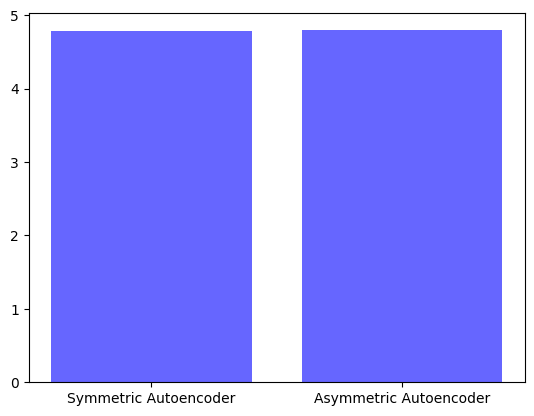

In [143]:
plt.bar(models, normal_mse, color='blue', alpha=0.6, label='Normal Data MSE')